<a href="https://colab.research.google.com/github/EugIva/ProzorovEI209M_CV/blob/main/HW1_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
def plot_one_image(image: np.ndarray) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция.

    :param image: изображение для отображения
    :return: None
    """
    fig, axs = plt.subplots(1, 1, figsize=(8, 7))

    axs.imshow(image)
    axs.axis('off')
    plt.plot()

In [92]:
import cv2
import numpy as np

def find_road_number(image: np.ndarray) -> int:
    # Преобразуем изображение в оттенки серого
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Применяем пороговое значение для выявления желтых линий
    _, thresholded_img = cv2.threshold(gray_image, 180, 255, cv2.THRESH_BINARY)

    # Находим контуры полос
    contours, _ = cv2.findContours(thresholded_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Сортируем контуры по x-координате
    contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])

    road_count = len(contours)

    # Определение позиций препятствий
    obstacle_positions = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        # Ищем красные прямоугольники как препятствия
        if y < image.shape[0] // 2:  # Проверяем только верхнюю половину изображения
            obstacle_positions.append((x + w // 2, y, w, h))

    # Определяем дорожные полосы и их номера
    road_numbers = []
    for i, contour in enumerate(contours):
        x, y, w, h = cv2.boundingRect(contour)
        road_numbers.append((x + w // 2, i))

    # Алгоритм выбора полосы для перестроения
    current_road_index = -1
    for i, (xc, road_index) in enumerate(road_numbers):
        for (xo, yo, w, h) in obstacle_positions:
            if road_index == current_road_index:
                break
            # Если препятствие находится на текущей полосе
            if xc - w // 2 < xo < xc + w // 2:
                current_road_index = road_index
                break

    # Определяем свободную дорогу, если текущая полоса заблокирована
    if current_road_index != -1:
        if current_road_index == 0 and len(road_numbers) > 1:
            return 1  # Перестраиваемся на первую правую
        elif current_road_index == len(road_numbers) - 1:
            return len(road_numbers) - 2  # Перестраиваемся на первую левую
        else:
            # Проверка левой и правой полос
            if current_road_index > 0 and all(xo < road_numbers[current_road_index - 1][0] for xo, yo, w, h in obstacle_positions):
                return current_road_index - 1
            elif current_road_index < len(road_numbers) - 1 and all(xo > road_numbers[current_road_index + 1][0] for xo, yo, w, h in obstacle_positions):
                return current_road_index + 1

    return -1  # Если нет необходимости перестраиваться

Нужно перестроиться на дорогу номер 1


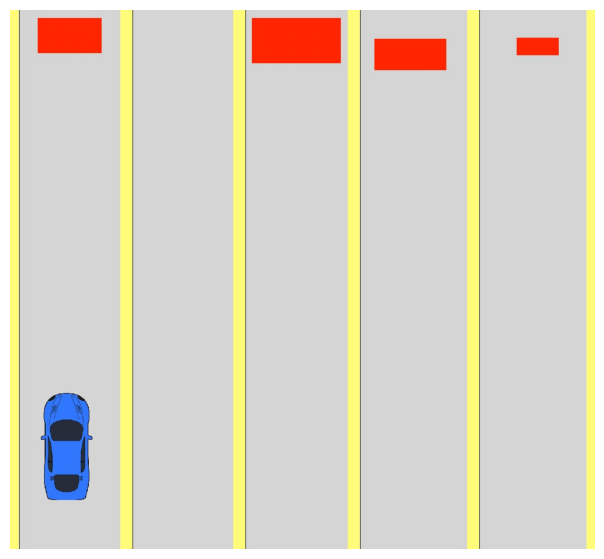

In [69]:
# ЗАПУСК
test_image = cv2.imread('image_00.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)
road_number = find_road_number(test_image)

print(f'Нужно перестроиться на дорогу номер {road_number}')

Нужно перестроиться на дорогу номер 3


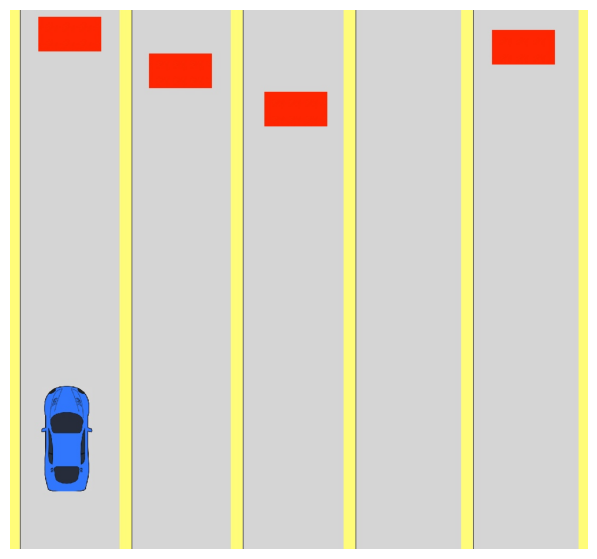

In [55]:
# ЗАПУСК
test_image = cv2.imread('image_01.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)
road_number = find_road_number(test_image)

print(f'Нужно перестроиться на дорогу номер {road_number}')

Нужно перестроиться на дорогу номер 0


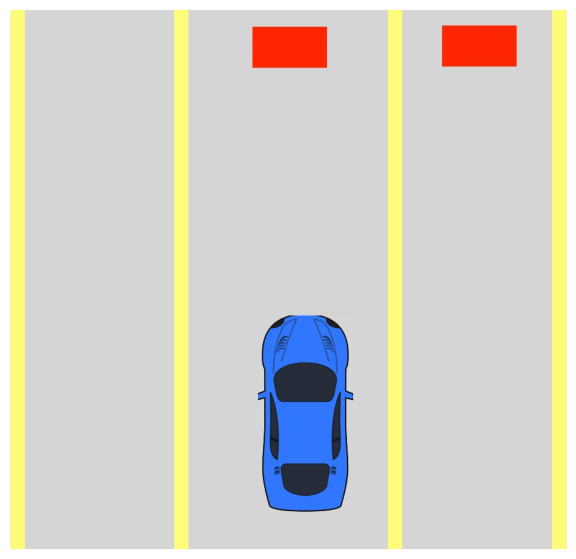

In [52]:
# ЗАПУСК
test_image = cv2.imread('image_02.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)
road_number = find_road_number(test_image)

print(f'Нужно перестроиться на дорогу номер {road_number}')